In [1]:
import pandas as pd

cases = [('RunInThisContext', 'vm.runInThisContext'), ('Eval', 'eval'),
         ('Exec', 'child_process.exec'), ('Spawn', 'child_process.spawn'), ('RegexpExec', 'Regexp.exec'), 
         ('Fs', 'fs sync')]

In [2]:
casesData = []

for c in cases:
    caseName = c[0]
    labelName = c[1]
    directCalls = pd.read_csv('transitiveUsage/directCalls{}.csv'.format(caseName))
    
    directCallsCount = len(directCalls)
    
    indirectCalls = pd.read_csv('transitiveUsage/indirectCalls{}.csv'.format(caseName))

    indirectCallsCount = len(indirectCalls)
    
    layeredReach = pd.read_json('transitiveUsage/layeredReach{}.json'.format(caseName), typ='series')

    layer1 = layeredReach[1] + directCallsCount
    layer2 = layeredReach[2] + layeredReach[1]

    totalReach = layeredReach.sum() + directCallsCount
    
    casesData.append((labelName, [directCallsCount, layer1, layer2, indirectCallsCount, totalReach])) 

casesData

[('vm.runInThisContext', [648, 6872, 11830, 897, 18068]),
 ('eval', [17316, 54534, 72087, 21047, 149474]),
 ('child_process.exec', [15514, 45846, 59953, 18870, 147492]),
 ('child_process.spawn', [14085, 51683, 80800, 23675, 194372]),
 ('Regexp.exec', [46887, 123619, 139476, 76591, 373105]),
 ('fs sync', [102136, 176795, 118524, 123985, 392201])]

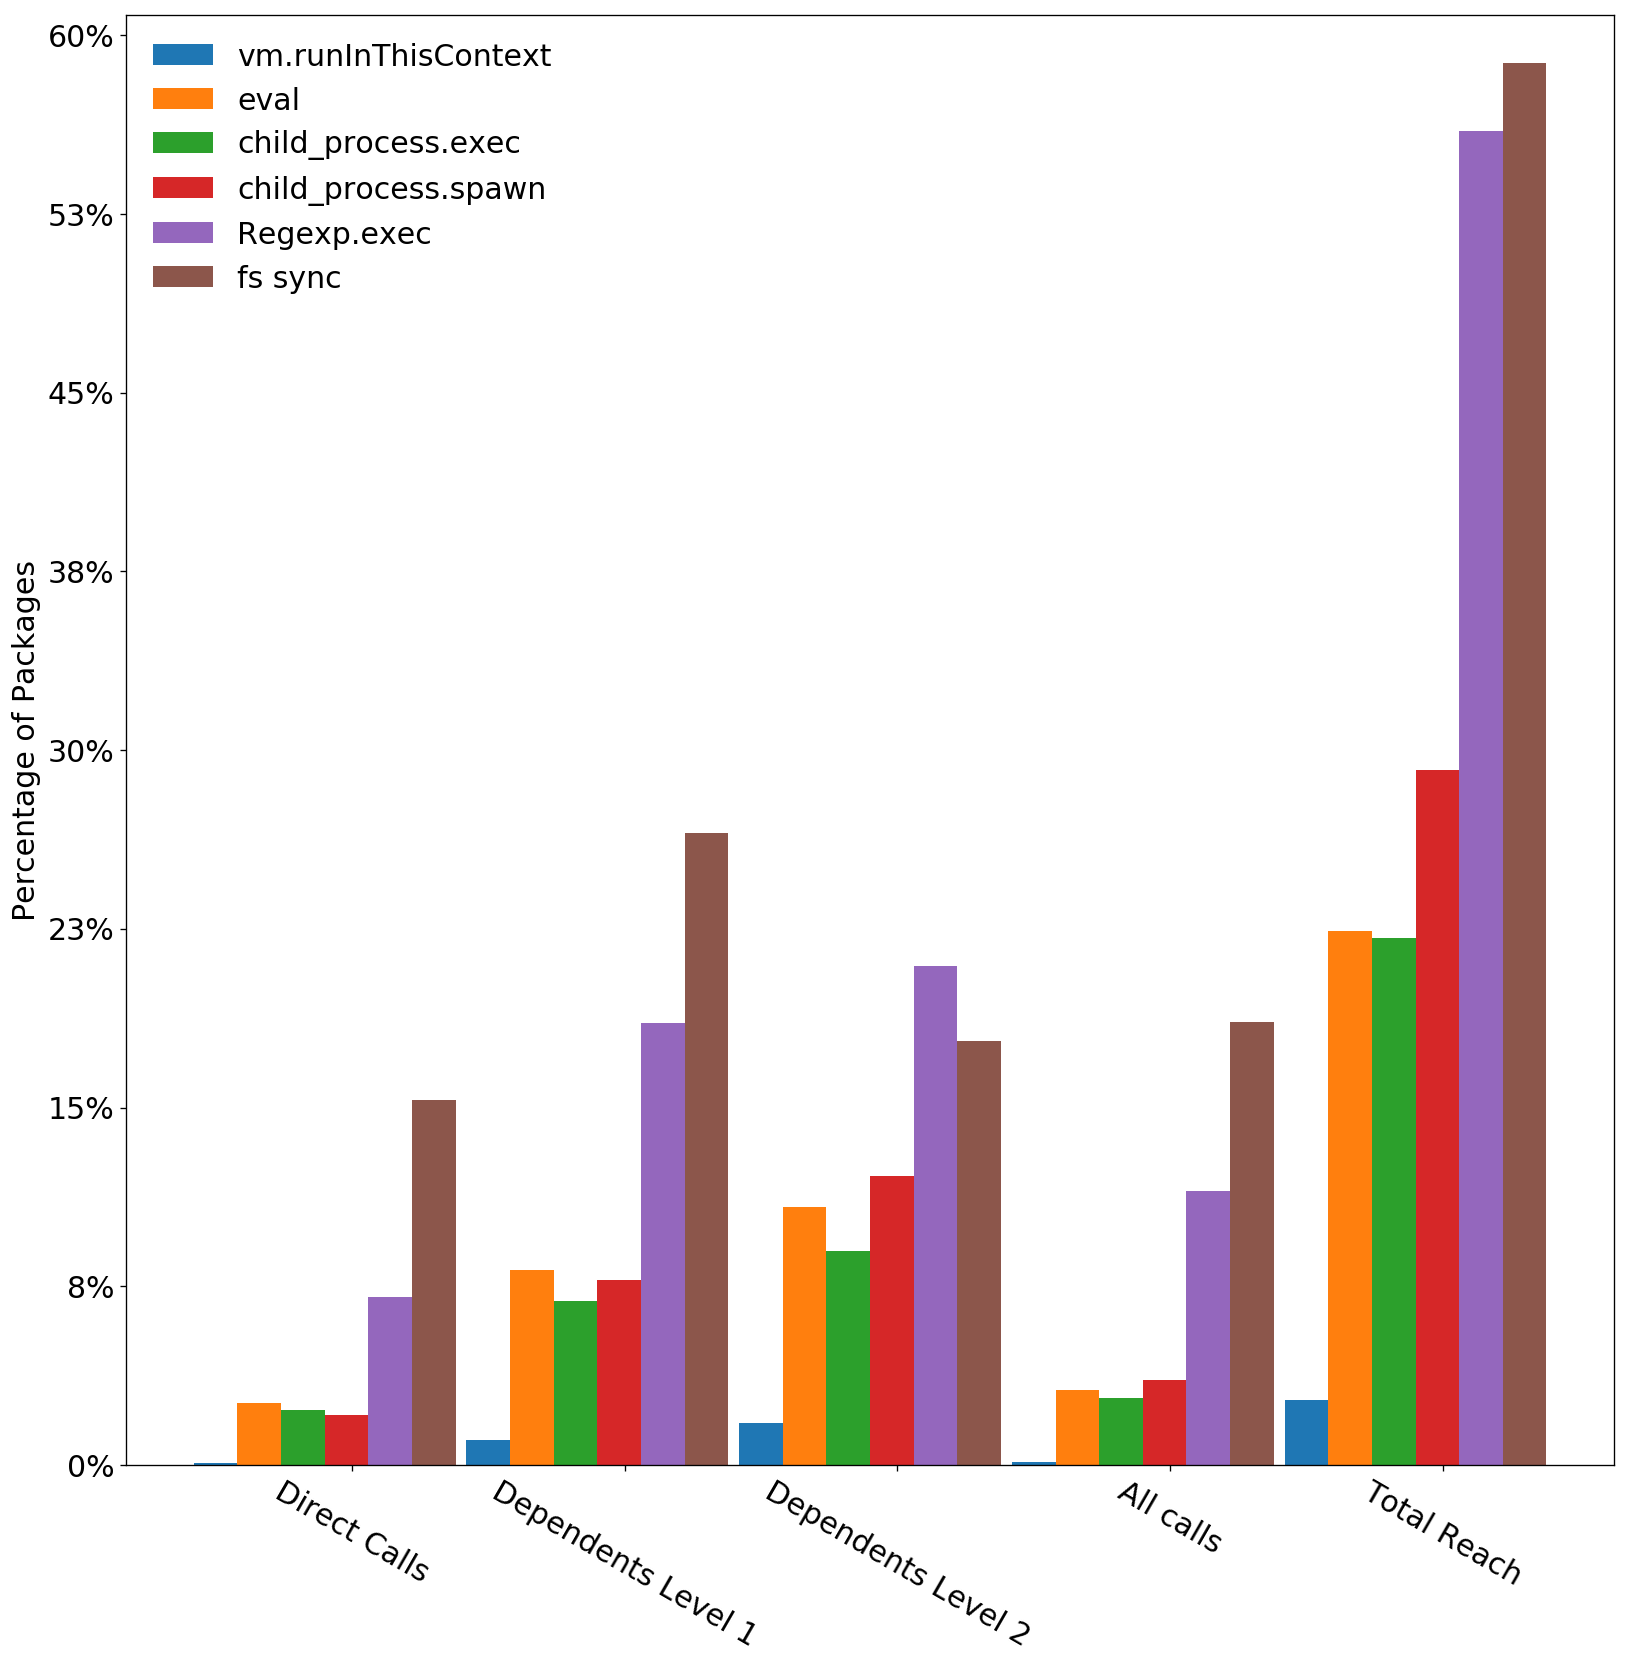

In [4]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
matplotlib.rcParams.update({'font.size': 18})

def calculatePercentage(x):
    return np.ceil(x/667224*100)

plt.figure(figsize=(16,16), dpi=120)

i = 0
for c in casesData:
    Y = c[1]
    X = np.arange(0, len(Y), step=1)
    plt.bar(X + i * 0.16, Y, label=c[0], width=0.16)
    i += 1 
    
# for x,y in zip(X,Y):
#     plt.text(x, y,'{:.2f}%'.format(y/667224*100), ha='center', va= 'bottom')

plt.ylabel('Percentage of Packages')
plt.ylim(0, np.max(Y) + 667224/100 * 2)
plt.gca().set_yticklabels(['{:.0f}%'.format(calculatePercentage(x)) for x in plt.gca().get_yticks()]) 
plt.xticks([0.5,1.5,2.5,3.5,4.5], ['Direct Calls', 'Dependents Level 1', 'Dependents Level 2', 'All calls', "Total Reach"], rotation=-30)
plt.legend(loc='best', frameon=False)

plt.savefig('transitiveUsage/comparison.png')
plt.show()
